<a href="https://colab.research.google.com/github/PlanetDestroyyer/Pytorch-Tutorial/blob/main/Working_with_images_in_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/',download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4151039.05it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 131482.01it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1075926.74it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9097673.72it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

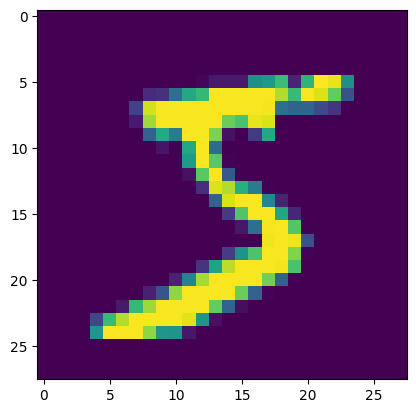

In [7]:
plt.imshow(dataset[0][0])

5


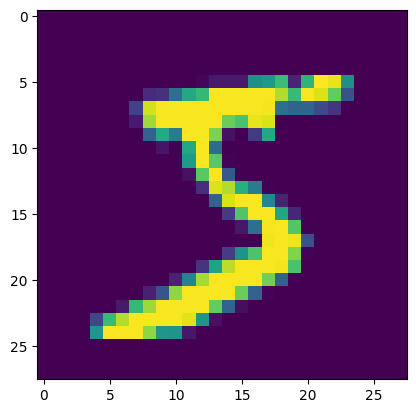

In [8]:
image,label = dataset[0]
plt.imshow(image)
print(label)

1


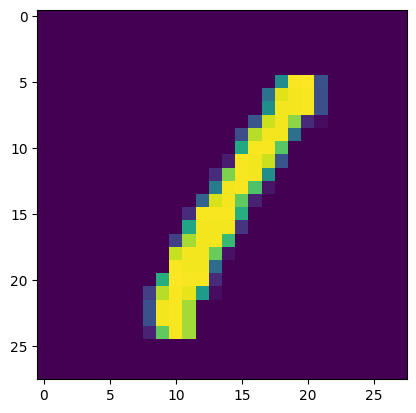

In [9]:
image,label = dataset[3]
plt.imshow(image)
print(label)

1


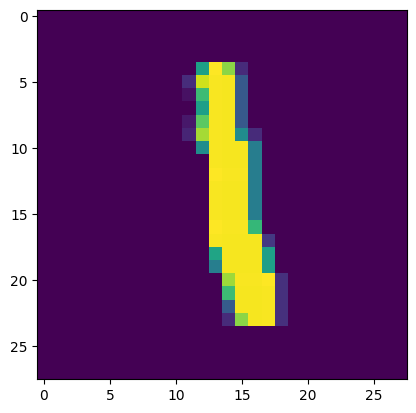

In [10]:
image,label = dataset[6]
plt.imshow(image)
print(label)

In [11]:
import torchvision.transforms as transforms

In [12]:
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [13]:
img_tensor , label = dataset[0]
print(img_tensor.shape)
print(label)

torch.Size([1, 28, 28])
5


5


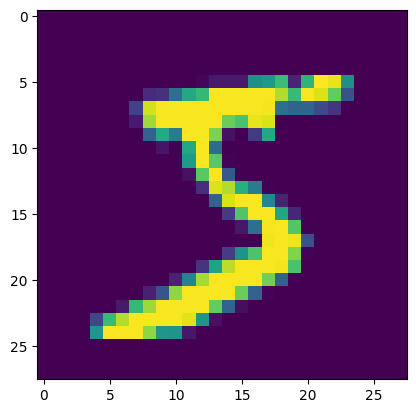

In [14]:
plt.imshow(img_tensor[0])
print(label)

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


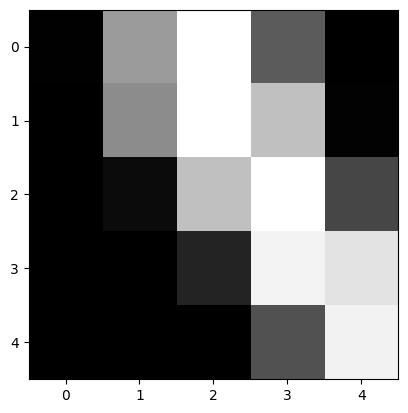

In [15]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray');
print(img_tensor[0,10:15,10:15])

In [16]:
from torch.utils.data import random_split
train_ds,val_ds = random_split(dataset,[50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

In [17]:
from torch.utils.data import DataLoader

In [18]:
batch_size = 150
train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)

In [19]:
import torch.nn as nn
from torch.nn import functional as F

In [20]:
input_size = 784
num_classes = 10

In [21]:
model = nn.Linear(input_size,num_classes)

In [22]:
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [23]:
model.weight

Parameter containing:
tensor([[ 0.0175,  0.0188,  0.0341,  ..., -0.0283,  0.0251, -0.0259],
        [ 0.0285, -0.0292, -0.0106,  ...,  0.0058,  0.0084,  0.0063],
        [ 0.0303,  0.0101, -0.0107,  ..., -0.0250, -0.0252,  0.0016],
        ...,
        [ 0.0228, -0.0079, -0.0078,  ...,  0.0275, -0.0019, -0.0352],
        [-0.0154, -0.0332,  0.0017,  ..., -0.0247,  0.0226,  0.0134],
        [ 0.0218, -0.0271, -0.0053,  ...,  0.0113, -0.0026,  0.0295]],
       requires_grad=True)

In [24]:
model.bias

Parameter containing:
tensor([-1.7588e-03, -3.4088e-02, -2.4442e-05,  2.4997e-02, -2.2427e-02,
        -4.6830e-03,  3.2898e-03, -1.9891e-02,  2.4585e-02, -9.5234e-03],
       requires_grad=True)

In [25]:
for images,labels in train_loader:
  print(images.shape)
  print(labels)
  outputs = model(images)
  break

torch.Size([150, 1, 28, 28])
tensor([8, 4, 5, 3, 1, 5, 8, 1, 1, 6, 5, 3, 6, 3, 3, 5, 1, 7, 3, 7, 7, 2, 6, 5,
        3, 7, 7, 4, 6, 7, 1, 6, 9, 0, 1, 8, 6, 1, 8, 4, 3, 7, 4, 8, 4, 6, 6, 1,
        7, 0, 2, 3, 9, 7, 7, 7, 8, 3, 1, 8, 0, 8, 7, 5, 6, 6, 6, 4, 1, 8, 9, 8,
        5, 3, 0, 8, 7, 1, 6, 6, 1, 7, 3, 1, 7, 5, 0, 3, 3, 2, 8, 1, 0, 1, 2, 1,
        3, 4, 8, 9, 8, 2, 6, 8, 4, 7, 1, 2, 7, 5, 8, 7, 5, 8, 7, 7, 6, 2, 7, 6,
        2, 0, 9, 8, 1, 1, 8, 6, 1, 9, 8, 0, 0, 1, 3, 5, 2, 8, 6, 7, 9, 9, 4, 3,
        2, 8, 7, 5, 2, 4])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (4200x28 and 784x10)

In [26]:
images.shape

torch.Size([150, 1, 28, 28])

In [27]:
images.reshape(-1,784).shape


torch.Size([150, 784])

In [32]:
class MNIST_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size,num_classes)

  def forward(self,x):
    x = x.reshape(-1,784)
    out = self.linear(x)
    return out

In [33]:
model = MNIST_model()

In [34]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [36]:
print(model.linear.weight.shape)
print(model.linear.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [37]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0167,  0.0029,  0.0071,  ...,  0.0222,  0.0207,  0.0014],
         [ 0.0071, -0.0069, -0.0102,  ..., -0.0036, -0.0180, -0.0067],
         [-0.0046,  0.0167,  0.0224,  ...,  0.0301,  0.0208, -0.0318],
         ...,
         [-0.0169,  0.0235, -0.0356,  ..., -0.0153, -0.0135,  0.0196],
         [-0.0279,  0.0283,  0.0112,  ..., -0.0145, -0.0208,  0.0277],
         [ 0.0224, -0.0091,  0.0128,  ...,  0.0121, -0.0139, -0.0079]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0301, -0.0201,  0.0099,  0.0058, -0.0302,  0.0156,  0.0341,  0.0222,
          0.0120, -0.0275], requires_grad=True)]

In [39]:
for images,labels in train_loader:
  outputs = model(images)
  print(outputs)
  print(labels)
  break

tensor([[-0.1634,  0.3099,  0.2661,  ...,  0.3489, -0.3743, -0.1980],
        [-0.1305,  0.1367,  0.0130,  ...,  0.2649, -0.1631,  0.0844],
        [-0.0443, -0.1287,  0.0365,  ..., -0.1645,  0.2071,  0.1998],
        ...,
        [-0.0311, -0.0661,  0.3300,  ..., -0.0893,  0.0777,  0.1464],
        [-0.1236, -0.0537,  0.1634,  ..., -0.0097, -0.0362,  0.0009],
        [-0.0843, -0.0200,  0.0715,  ...,  0.1039, -0.1242, -0.0250]],
       grad_fn=<AddmmBackward0>)
tensor([0, 5, 7, 7, 2, 1, 0, 7, 5, 8, 8, 7, 6, 4, 7, 9, 3, 1, 2, 2, 1, 1, 0, 2,
        2, 2, 2, 4, 8, 3, 9, 8, 9, 1, 2, 8, 2, 1, 0, 0, 3, 8, 5, 3, 8, 1, 9, 1,
        3, 2, 1, 6, 7, 2, 1, 5, 0, 8, 7, 8, 7, 8, 5, 1, 5, 0, 5, 7, 8, 7, 3, 7,
        6, 0, 9, 7, 3, 3, 3, 5, 9, 4, 3, 3, 2, 2, 7, 4, 2, 1, 2, 3, 0, 5, 1, 6,
        0, 7, 9, 6, 1, 3, 8, 0, 2, 9, 7, 8, 4, 4, 5, 2, 2, 5, 2, 4, 2, 5, 8, 3,
        3, 6, 2, 1, 8, 3, 6, 4, 9, 7, 4, 0, 4, 3, 1, 2, 5, 7, 9, 8, 5, 3, 2, 2,
        1, 8, 7, 8, 4, 9])


In [42]:
len(labels)

150

In [40]:
outputs.shape

torch.Size([150, 10])

In [41]:
outputs[:2].data

tensor([[-0.1634,  0.3099,  0.2661,  0.3713,  0.1988,  0.0860, -0.1204,  0.3489,
         -0.3743, -0.1980],
        [-0.1305,  0.1367,  0.0130, -0.1244,  0.1083,  0.0342,  0.0303,  0.2649,
         -0.1631,  0.0844]])

In [47]:
prods = F.softmax(outputs,dim=1)
print(prods[:2].data)
print(torch.sum(prods[0]).item())

tensor([[0.0766, 0.1229, 0.1177, 0.1307, 0.1100, 0.0983, 0.0800, 0.1278, 0.0620,
         0.0740],
        [0.0849, 0.1109, 0.0980, 0.0854, 0.1078, 0.1001, 0.0997, 0.1260, 0.0821,
         0.1052]])
1.0


In [56]:
max_prods , pred = torch.max(prods,dim=1)
print(max_prods)
print(pred)

tensor([0.1307, 0.1260, 0.1228, 0.1225, 0.1301, 0.1242, 0.1430, 0.1150, 0.1246,
        0.1382, 0.1239, 0.1311, 0.1354, 0.1129, 0.1300, 0.1216, 0.1355, 0.1133,
        0.1276, 0.1253, 0.1120, 0.1250, 0.1366, 0.1348, 0.1278, 0.1143, 0.1280,
        0.1189, 0.1408, 0.1367, 0.1229, 0.1305, 0.1193, 0.1343, 0.1341, 0.1386,
        0.1398, 0.1251, 0.1301, 0.1359, 0.1539, 0.1175, 0.1236, 0.1278, 0.1269,
        0.1210, 0.1304, 0.1110, 0.1375, 0.1307, 0.1279, 0.1259, 0.1185, 0.1209,
        0.1151, 0.1283, 0.1560, 0.1503, 0.1314, 0.1270, 0.1276, 0.1271, 0.1445,
        0.1319, 0.1442, 0.1251, 0.1262, 0.1230, 0.1485, 0.1231, 0.1494, 0.1233,
        0.1458, 0.1161, 0.1155, 0.1129, 0.1221, 0.1327, 0.1677, 0.1244, 0.1396,
        0.1117, 0.1323, 0.1421, 0.1323, 0.1340, 0.1216, 0.1162, 0.1768, 0.1079,
        0.1366, 0.1605, 0.1282, 0.1224, 0.1241, 0.1472, 0.1348, 0.1196, 0.1396,
        0.1374, 0.1114, 0.1204, 0.1525, 0.1499, 0.1163, 0.1388, 0.1174, 0.1290,
        0.1152, 0.1266, 0.1253, 0.1642, 

In [84]:
labels

tensor([0, 5, 7, 7, 2, 1, 0, 7, 5, 8, 8, 7, 6, 4, 7, 9, 3, 1, 2, 2, 1, 1, 0, 2,
        2, 2, 2, 4, 8, 3, 9, 8, 9, 1, 2, 8, 2, 1, 0, 0, 3, 8, 5, 3, 8, 1, 9, 1,
        3, 2, 1, 6, 7, 2, 1, 5, 0, 8, 7, 8, 7, 8, 5, 1, 5, 0, 5, 7, 8, 7, 3, 7,
        6, 0, 9, 7, 3, 3, 3, 5, 9, 4, 3, 3, 2, 2, 7, 4, 2, 1, 2, 3, 0, 5, 1, 6,
        0, 7, 9, 6, 1, 3, 8, 0, 2, 9, 7, 8, 4, 4, 5, 2, 2, 5, 2, 4, 2, 5, 8, 3,
        3, 6, 2, 1, 8, 3, 6, 4, 9, 7, 4, 0, 4, 3, 1, 2, 5, 7, 9, 8, 5, 3, 2, 2,
        1, 8, 7, 8, 4, 9])

In [85]:
pred == labels

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, 

In [86]:
def accuracy(outputs,lables):
  _,pred = torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(pred == labels).item()/len(pred))

In [87]:
accuracy(outputs,labels)*100

tensor(5.3333)

In [74]:
loss = F.cross_entropy(outputs,labels)
print(loss)

tensor(2.3575, grad_fn=<NllLossBackward0>)


In [75]:
def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
  optimizer = opt_func(model.parameters(),lr)
  history = []

  for epoch in range(epochs):
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    result = evaluate(model,val_loader)
    model.epoch_end(epoch,result)
    history.append(result)

  return history

In [76]:
def evaluate(model,val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [77]:
class MNIST_MODEL(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size,num_classes)

  def forward(self,x):
    x = x.reshape(-1,784)
    out = self.linear(x)
    return out

  def training_step(self,batch):
    images,labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    return loss


  def validation_step(self,batch):
    images,labels = batch
    out= self(images)
    loss = F.cross_entropy(out,labels)
    acc = accuracy(out,labels)
    return {'val_loss':loss.detach(),'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self,epoch,result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch,result['val_loss'],result['val_acc']))


model = MNIST_MODEL()

In [91]:
def evaluate(model, val_loader):
    model.eval()  # Set model to evaluation mode
    outputs = []
    with torch.no_grad():  # Disable gradient calculation
        for batch in val_loader:
            outputs.append(model.validation_step(batch))
    return model.validation_epoch_end(outputs)

# Define accuracy function
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    # Ensure that preds and labels are the same size before comparison
    if preds.size(0) != labels.size(0):
        return torch.tensor(0.0)  # or handle it as you prefer
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Create the model
model = MNIST_MODEL()

# Drop the last incomplete batch for val_loader
val_loader = DataLoader(val_ds, batch_size=batch_size, drop_last=True)

# Evaluate the model
result0 = evaluate(model, val_loader)
print(result0)


{'val_loss': 2.3474953174591064, 'val_acc': 0.10484848916530609}


In [92]:
result0 = evaluate(model,val_loader)
result0

{'val_loss': 2.3474953174591064, 'val_acc': 0.10484848916530609}

In [93]:
history1 = fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 2.0121, val_acc: 0.5785
Epoch [1], val_loss: 1.7627, val_acc: 0.7232
Epoch [2], val_loss: 1.5691, val_acc: 0.7586
Epoch [3], val_loss: 1.4178, val_acc: 0.7765
Epoch [4], val_loss: 1.2981, val_acc: 0.7886


In [94]:
history1 = fit(20,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 1.2023, val_acc: 0.7999
Epoch [1], val_loss: 1.1240, val_acc: 0.8076
Epoch [2], val_loss: 1.0592, val_acc: 0.8137
Epoch [3], val_loss: 1.0048, val_acc: 0.8200
Epoch [4], val_loss: 0.9586, val_acc: 0.8231
Epoch [5], val_loss: 0.9187, val_acc: 0.8269
Epoch [6], val_loss: 0.8840, val_acc: 0.8302
Epoch [7], val_loss: 0.8536, val_acc: 0.8338
Epoch [8], val_loss: 0.8265, val_acc: 0.8375
Epoch [9], val_loss: 0.8025, val_acc: 0.8399
Epoch [10], val_loss: 0.7808, val_acc: 0.8420
Epoch [11], val_loss: 0.7613, val_acc: 0.8445
Epoch [12], val_loss: 0.7436, val_acc: 0.8474
Epoch [13], val_loss: 0.7273, val_acc: 0.8489
Epoch [14], val_loss: 0.7125, val_acc: 0.8513
Epoch [15], val_loss: 0.6989, val_acc: 0.8525
Epoch [16], val_loss: 0.6862, val_acc: 0.8536
Epoch [17], val_loss: 0.6744, val_acc: 0.8552
Epoch [18], val_loss: 0.6635, val_acc: 0.8564
Epoch [19], val_loss: 0.6534, val_acc: 0.8576


In [95]:
torch.save(model.state_dict(),'mnist-logs.pth')